In [1]:
# importing the libraries 
# make sure that tree_functions_2.py is in the same directory as this notebook

from tree_functions_2 import *

# calling the appropriate tools for classification

from sklearn import tree

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split

import graphviz

In [2]:
# change figure configurations

%matplotlib inline

import matplotlib

font = {'size':16}

matplotlib.rc('font', **font)

matplotlib.rc('figure', figsize = (5.0, 5.0))

In [3]:
# the order of the trees 

n = 18

l = int(np.ceil(n / 2))

In [4]:
# setting a random seed

random.seed(42)

## Generating the Tree List and the Associated Data Frame

In [5]:
# creating the list of all non-isomorphic trees of order n

Tree_List_1 = list(nx.nonisomorphic_trees(n))

In [6]:
# classes for trees (0 is path-like and 1 is star-like)

classes = [0, 1] 

In [7]:
# sampling 500 trees from Tree_List_1

Sample = np.random.choice(range(len(Tree_List_1)), 500, replace = False)

Tree_List = [Tree_List_1[i] for i in Sample]

In [8]:
# evaluation-based total ordering on Tree_List

total_tree_evaluation_list = get_total_list_evaluation_based(Tree_List, 2, 1)

In [9]:
# classifying the trees Tree_List as 'path-like' and 'star-like'
# based on the total ordering

for j in range(len(total_tree_evaluation_list)):
    
    if j < len(total_tree_evaluation_list)/2:
        
        total_tree_evaluation_list[j].append(classes[0])
        
    else:
        
        total_tree_evaluation_list[j].append(classes[1]) 

In [10]:
# data frame containing the following graph statistics:
# log_{10}(P(.;2,1)), radius,  diameter, degree centrality, 
# closeness centrality, between centrality,
# Stirling Numbers of the First Kind for Trees, number of leaves, and class 

df = []

for i in range(len(total_tree_evaluation_list)):
    
    x = total_tree_evaluation_list[i]
        
    df.append([np.log10(float(x[0])), nx.radius(x[1]), nx.diameter(x[1]),
               get_degree_centrality(x[1]),
               get_closeness_centrality(x[1]),
               get_betweenness_centrality(x[1]),
               get_stirling_trees(x[1], n),
               get_leaf_number(x[1]),
               x[3]])
    
df = pd.DataFrame(df, columns = ['Log_Dist', 'Rad', 'Diam', 'Deg_Cent', 
                                 'Cls_Cent', 'Btw_Cent', 'Stirling', 'Leaf_Num', 'Class'])

In [11]:
df.head()

,Log_Dist,Rad,Diam,Deg_Cent,Cls_Cent,Btw_Cent,Stirling,Leaf_Num,Class
0,7.162275,7,13,0.073529,0.112323,0.261246,"[1, 38, 271, 770, 1116, 911, 433, 118, 17, 1]",4,0
1,7.558962,7,13,0.073529,0.191456,0.458045,"[0, 11, 157, 612, 1024, 888, 431, 118, 17, 1]",4,0
2,8.016461,7,13,0.139706,0.181958,0.472751,"[0, 11, 165, 606, 991, 860, 422, 117, 17, 1]",4,0
3,10.084077,7,14,0.139706,0.116287,0.293685,"[0, 5, 102, 447, 834, 790, 408, 116, 17, 1]",5,0
4,10.481775,6,11,0.073529,0.156594,0.417388,"[0, 24, 203, 638, 995, 856, 421, 117, 17, 1]",5,0


## Splitting the Tree List to Train and Test Sets

In [12]:
X = df.iloc[:, [4, 5, 8]]

In [13]:
y = pd.DataFrame(np.array(list(df.loc[:, 'Stirling']))).iloc[:, 0:-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [15]:
X_train = np.array(X_train)

X_test = np.array(X_test)

## Training and Testing Regressor

In [16]:
# setting a random seed

random_state =  np.random.RandomState(seed = 42)

In [17]:
DF = []

## Trees

### Decision Tree

#### Decision Tree

In [18]:
# decision tree

dtr = DecisionTreeRegressor(random_state = random_state)

# DecisionTreeRegressor(*, criterion='squared_error', splitter='best', 
#                       max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#                       min_weight_fraction_leaf=0.0, max_features=None, 
#                       random_state=None, max_leaf_nodes=None, 
#                       min_impurity_decrease=0.0, ccp_alpha=0.0)

dtr.fit(X_train, y_train)

y_train_dtr_pred = dtr.predict(X_train)

y_test_dtr_pred = dtr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_dtr_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_dtr_pred))

print('--------')

print('Train Score:', dtr.score(X_train, y_train))

print('Test Score:', dtr.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_dtr_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_dtr_pred))

#print('--------')

# https://scikit-learn.org/stable/modules/tree.html#tree

#tree_data = tree.export_graphviz(dtr, out_file = None) 

#graph = graphviz.Source(tree_data) 

#graph  

Train MSE: 0.14777777777777779
Test MSE: 11659.288444444443
--------
Train Score: 0.9999953264427079
Test Score: 0.08569606484771558
--------
Train EVS: 0.9999953264427079
Test EVS: 0.08865699475512805


In [19]:
# from https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

path = dtr.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

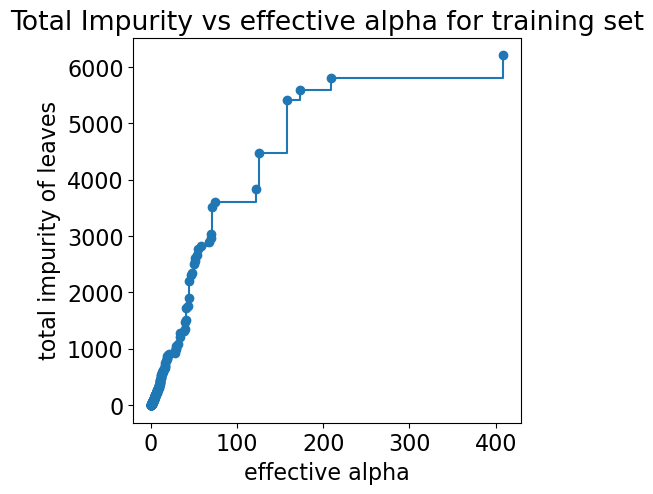

In [20]:
fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')

ax.set_xlabel('effective alpha')

ax.set_ylabel('total impurity of leaves')

ax.set_title('Total Impurity vs effective alpha for training set')

In [21]:
dtrs = []

for ccp_alpha in ccp_alphas:
    
    dtr = DecisionTreeRegressor(random_state = random_state, ccp_alpha = ccp_alpha)
    
    dtr.fit(X_train, y_train)
    
    dtrs.append(dtr)

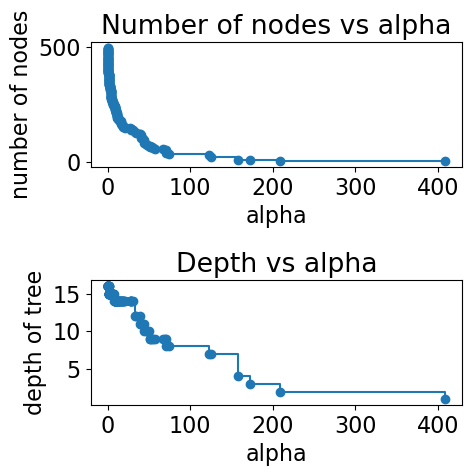

In [22]:
dtrs = dtrs[:-1]

ccp_alphas = ccp_alphas[:-1]

node_counts = [dtr.tree_.node_count for dtr in dtrs]

depth = [dtr.tree_.max_depth for dtr in dtrs]

fig, ax = plt.subplots(2, 1)

ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = 'steps-post')

ax[0].set_xlabel('alpha')

ax[0].set_ylabel('number of nodes')

ax[0].set_title('Number of nodes vs alpha')

ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = 'steps-post')

ax[1].set_xlabel('alpha')

ax[1].set_ylabel('depth of tree')

ax[1].set_title('Depth vs alpha')

fig.tight_layout()

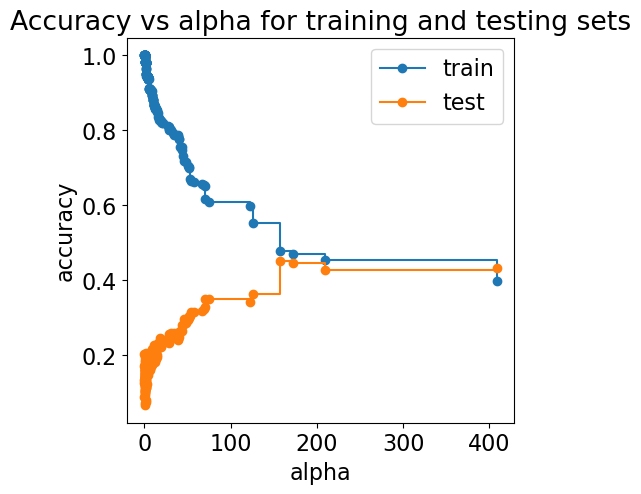

In [23]:
train_scores = [dtr.score(X_train, y_train) for dtr in dtrs]

test_scores = [dtr.score(X_test, y_test) for dtr in dtrs]

fig, ax = plt.subplots()

ax.set_xlabel('alpha')

ax.set_ylabel('accuracy')

ax.set_title('Accuracy vs alpha for training and testing sets')

ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')

ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')

ax.legend()

plt.show()

In [24]:
# decision tree with pruning

dtr = DecisionTreeRegressor(random_state = random_state, ccp_alpha = 1)

# DecisionTreeRegressor(*, criterion=splitter='best', 
#                       max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#                       min_weight_fraction_leaf=0.0, max_features=None, 
#                       random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                       class_weight=None, ccp_alpha=0.0)

dtr.fit(X_train, y_train)

y_train_dtr_pred = dtr.predict(X_train)

y_test_dtr_pred = dtr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_dtr_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_dtr_pred))

print('--------')

print('Train Score:', dtr.score(X_train, y_train))

print('Test Score:', dtr.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_dtr_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_dtr_pred))

#print('--------')

# https://scikit-learn.org/stable/modules/tree.html#tree

#tree_data = tree.export_graphviz(dtr, out_file = None) 

#graph = graphviz.Source(tree_data) 

#graph 

Train MSE: 21.783333333333335
Test MSE: 10262.995165432098
--------
Train Score: 0.9827886301673724
Test Score: 0.15997258269821096
--------
Train EVS: 0.9827886301673724
Test EVS: 0.16225731417737788


In [25]:
def dt_reg(X_train, X_test, y_train, y_test, prune_list = np.zeros(shape(y_train)[1] - 1), prune = False):   
    
    for m in range(shape(y_train)[1] - 1):
    
        y_train_trunc = np.ravel(np.array(list(y_train.iloc[:, m])))

        y_test_trunc = np.ravel(np.array(list(y_test.iloc[:, m])))
    
        dtr = DecisionTreeRegressor(random_state = random_state, ccp_alpha = prune_list[m] * prune)
        
        dtr.fit(X_train, y_train_trunc)

        y_pred_train = dtr.predict(X_train)

        y_pred_train_rounded = [np.rint(y_pred_train[i]) for i in range(len(y_pred_train))]

        y_pred_test = dtr.predict(X_test)

        y_pred_test_rounded = [np.rint(y_pred_test[i]) for i in range(len(y_pred_test))]
        
        if prune == False:
            
            path = dtr.cost_complexity_pruning_path(X_train, y_train_trunc)
            
            ccp_alphas, impurities = path.ccp_alphas, path.impurities
        
            fig, ax = plt.subplots()

            ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')

            ax.set_xlabel('effective alpha')

            ax.set_ylabel('total impurity of leaves')

            ax.set_title('Total Impurity vs effective alpha for training set')
        
            dtrs = []

            for ccp_alpha in ccp_alphas:
    
                dtr = DecisionTreeRegressor(random_state = random_state, ccp_alpha = ccp_alpha)
    
                dtr.fit(X_train, y_train_trunc)
    
                dtrs.append(dtr)
        
            dtrs = dtrs[:-1]

            ccp_alphas = ccp_alphas[:-1]

            node_counts = [dtr.tree_.node_count for dtr in dtrs]

            depth = [dtr.tree_.max_depth for dtr in dtrs]

            fig, ax = plt.subplots(2, 1)

            ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = 'steps-post')

            ax[0].set_xlabel('alpha')

            ax[0].set_ylabel('number of nodes')

            ax[0].set_title('Number of nodes vs alpha')

            ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = 'steps-post')

            ax[1].set_xlabel('alpha')

            ax[1].set_ylabel('depth of tree')

            ax[1].set_title('Depth vs alpha')

            fig.tight_layout()
        
            train_scores = [dtr.score(X_train, y_train_trunc) for dtr in dtrs]

            test_scores = [dtr.score(X_test, y_test_trunc) for dtr in dtrs]

            fig, ax = plt.subplots()

            ax.set_xlabel('alpha')

            ax.set_ylabel('accuracy')

            ax.set_title('Accuracy vs alpha for training and testing sets')

            ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')

            ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')

            ax.legend()

            plt.show()

        DF.append(['dtr', 1 * prune, m + l,
                   round(dtr.score(X_train, y_train_trunc), 5),
                   round(dtr.score(X_test, y_test_trunc), 5),
                   round(explained_variance_score(y_train_trunc, y_pred_train), 5),
                   round(explained_variance_score(y_test_trunc, y_pred_test), 5)])
        
    return DF

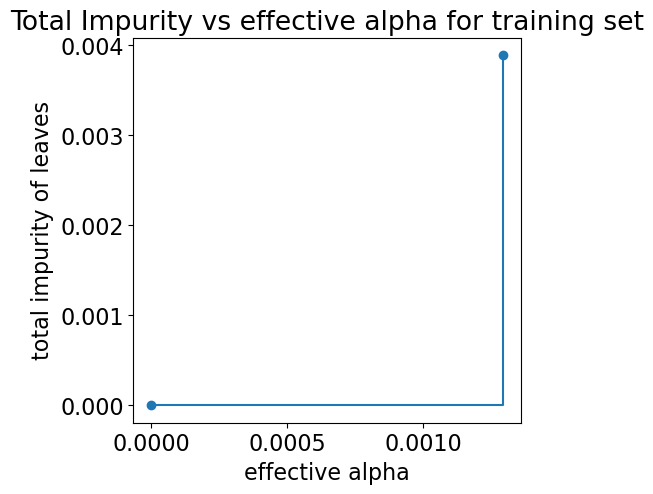

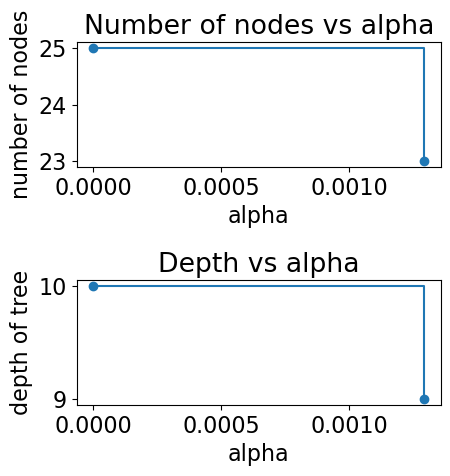

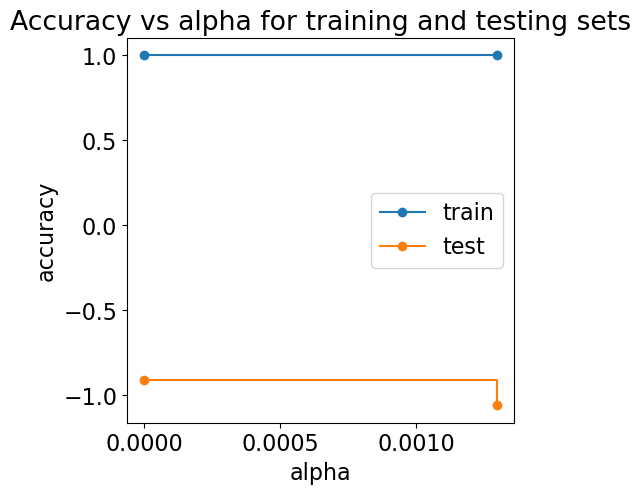

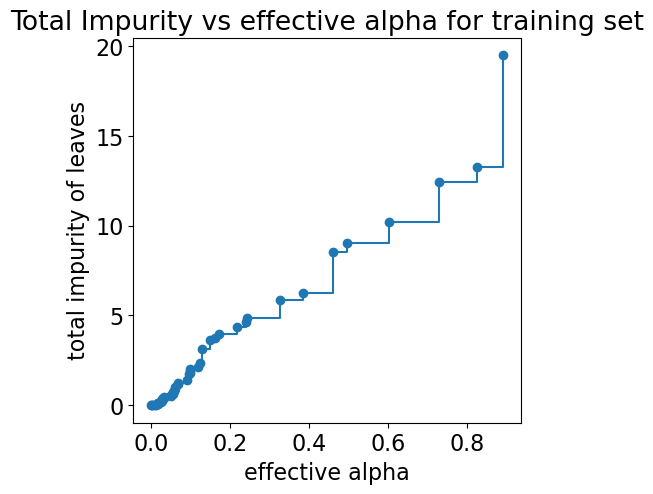

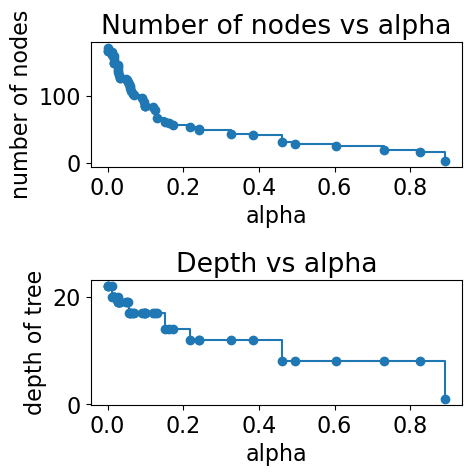

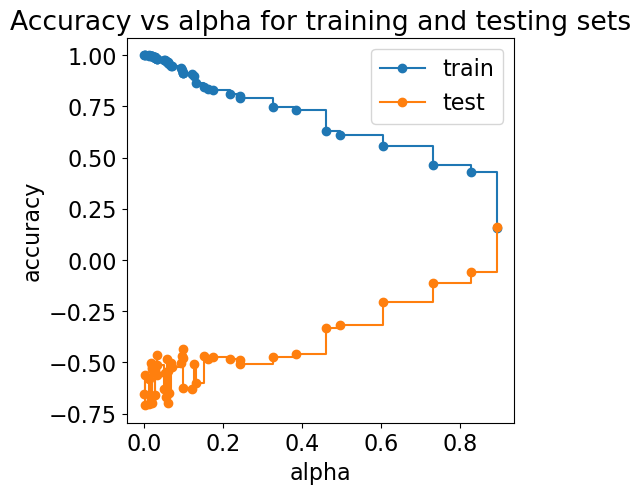

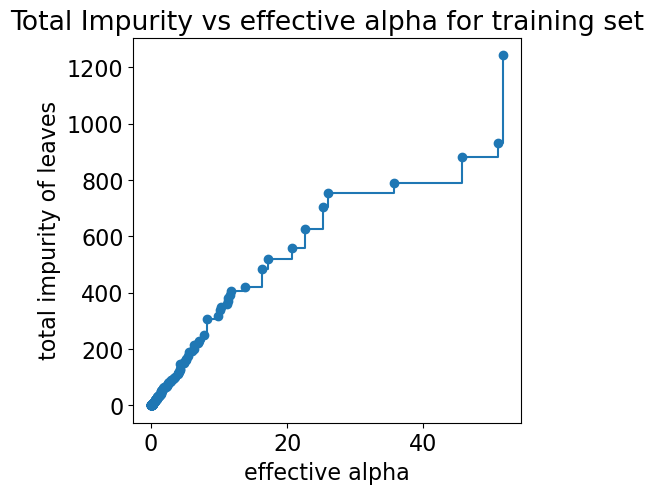

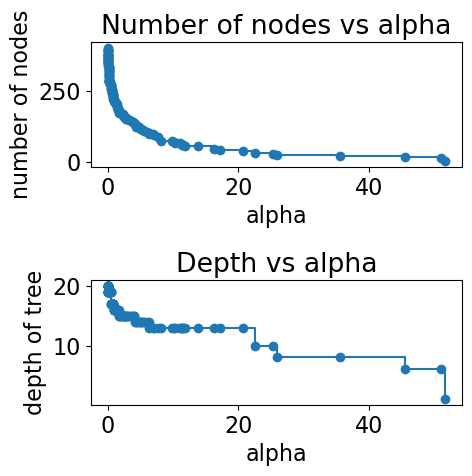

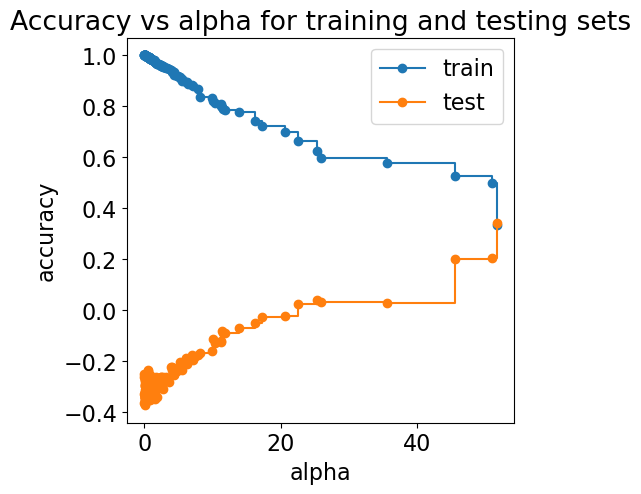

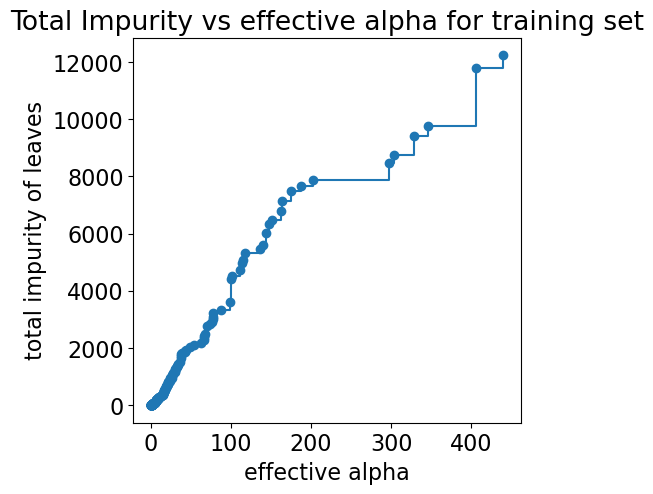

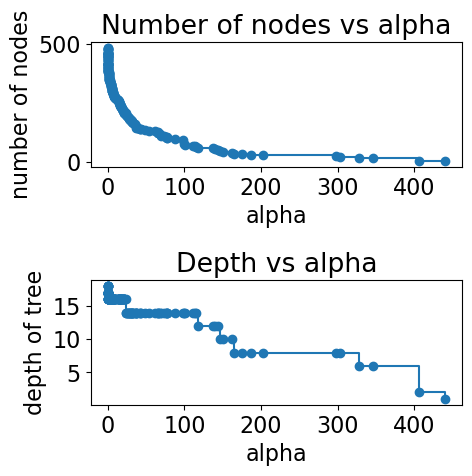

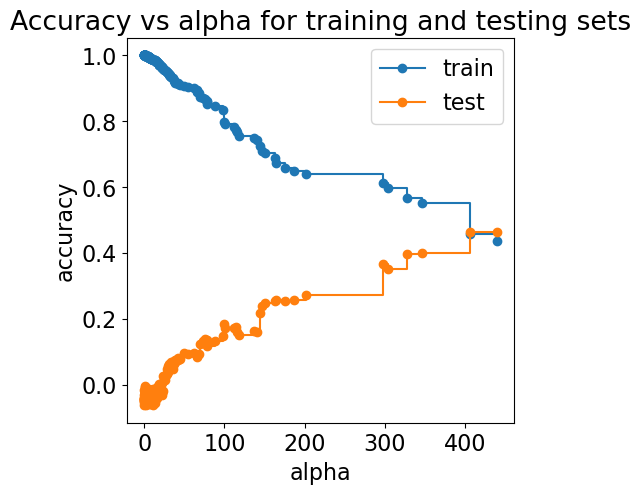

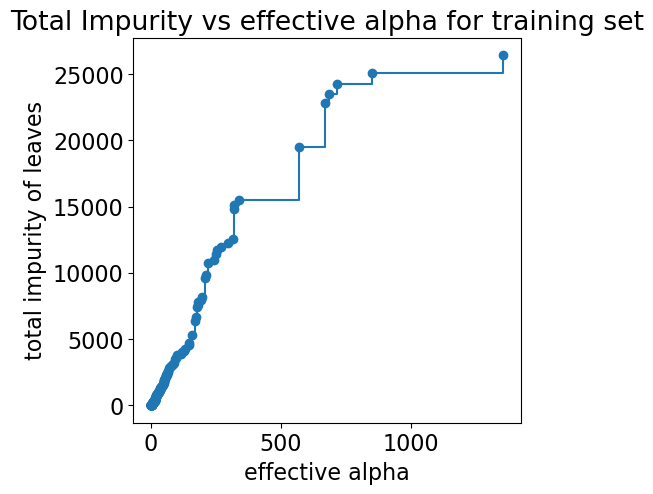

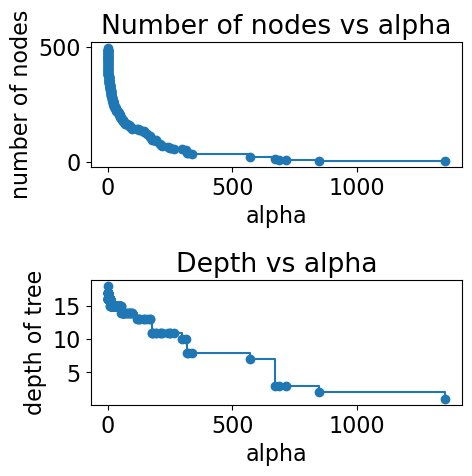

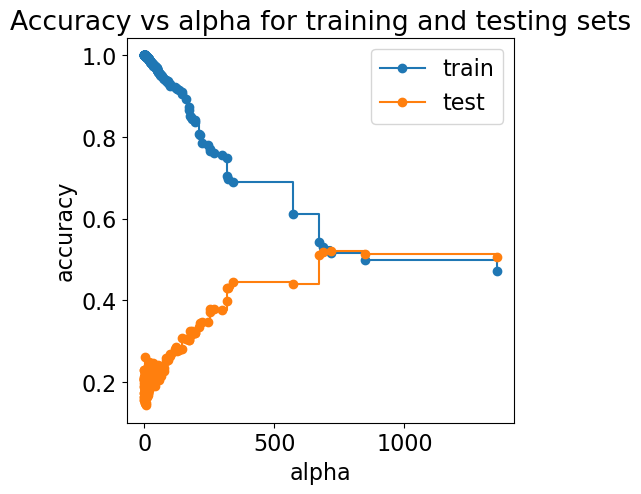

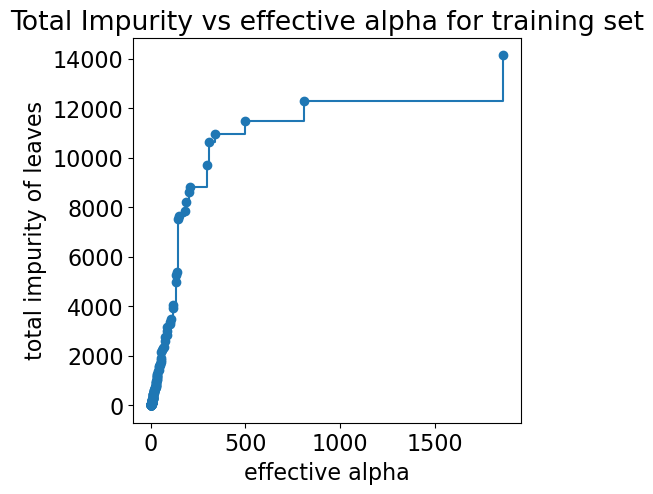

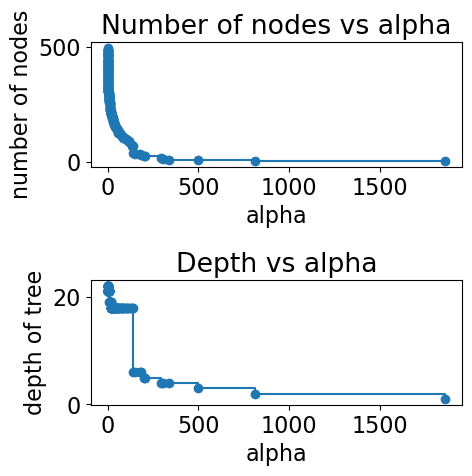

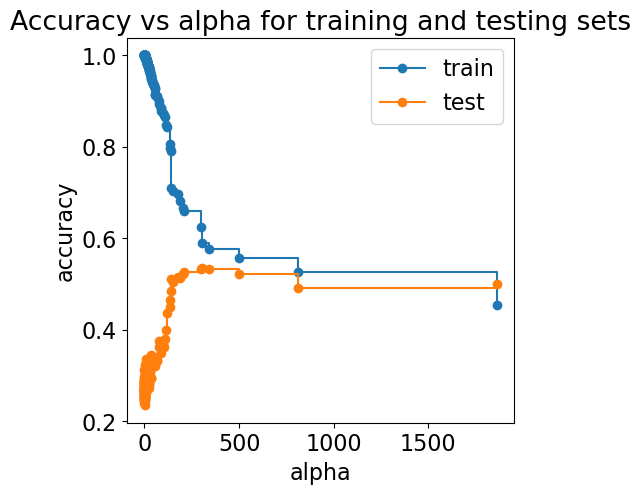

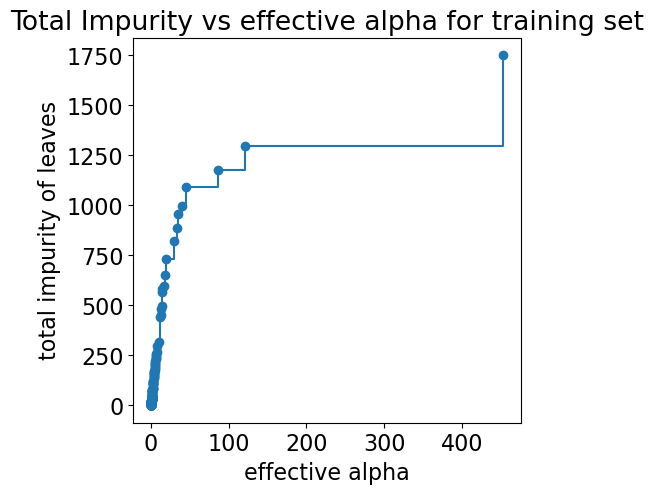

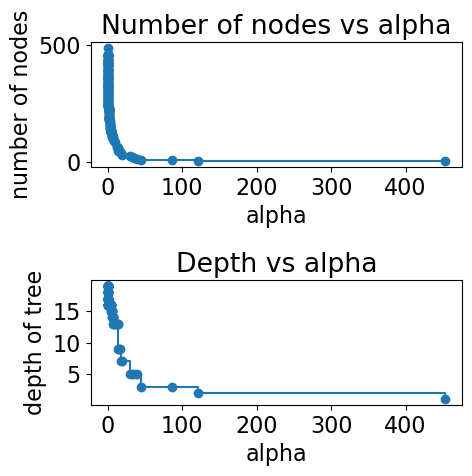

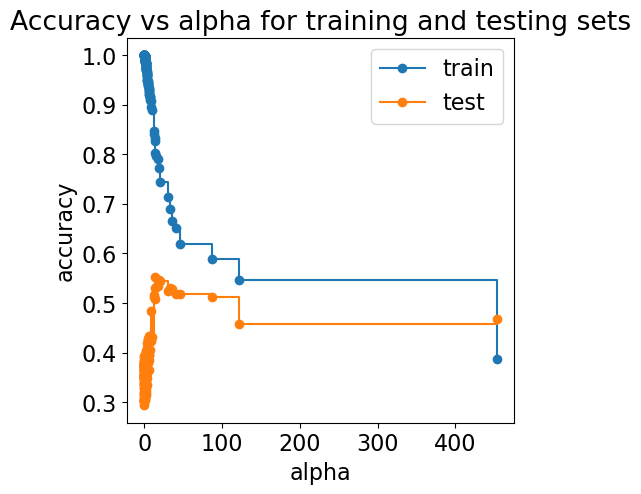

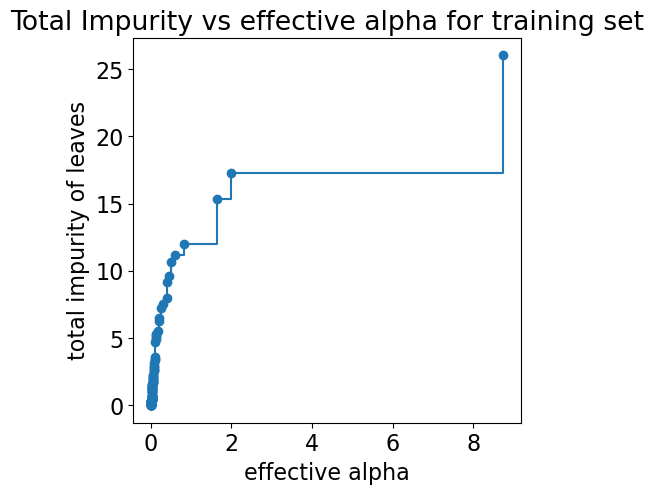

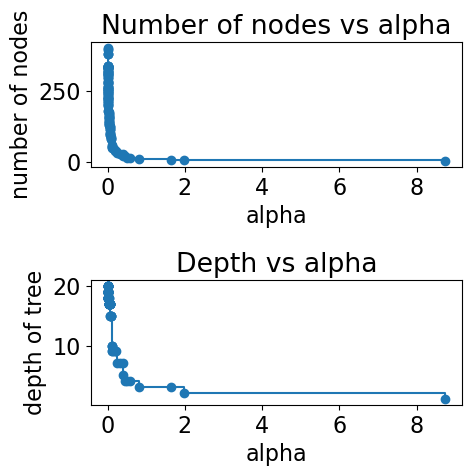

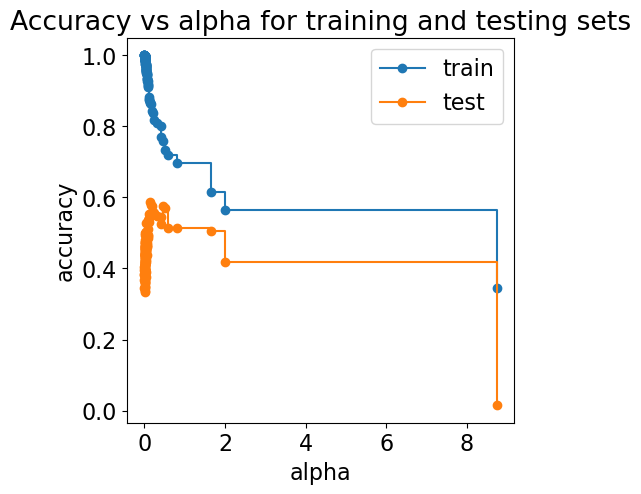

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726]]

In [26]:
dt_reg(X_train, X_test, y_train, y_test)

In [27]:
dt_reg(X_train, X_test, y_train, y_test, 
       prune_list = [0, 1, 20, 250, 1000, 250, 100, 1], prune = True)

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726],
 ['dtr', 1, 9, 1.0, -1.05761, 1.0, -1.05761],
 ['dtr', 1, 10, 0.15764, 0.15901, 0.15764, 0.16791],
 ['dtr', 1, 11, 0.72275, -0.02509, 0.72275, -0.01583],
 ['dtr', 1, 12, 0.63831, 0.27245, 0.63831, 0.27291],
 ['dtr', 1, 13, 0.4992, 0.51344, 0.4992, 0.51401],
 ['dtr', 1, 14, 0.65884, 0.52571, 0.65884, 0.52635],
 ['dtr', 1, 15, 0.58876, 0.51255, 0.58876, 0.51303],
 ['dtr', 1, 16, 0.69773, 0.51399, 0.69773, 0.51407]]

### Extra Tree

#### Extra Tree

In [28]:
# extra tree

etr = ExtraTreeRegressor(random_state = random_state)

# ExtraTreeRegressor(*, criterion='squared_error', splitter='random', 
#                    max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#                    min_weight_fraction_leaf=0.0, max_features=1.0, 
#                    random_state=None, min_impurity_decrease=0.0, 
#                    max_leaf_nodes=None, ccp_alpha=0.0)

etr.fit(X_train, y_train)

y_train_etr_pred = etr.predict(X_train)

y_test_etr_pred = etr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_dtr_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_dtr_pred))

print('--------')

print('Train Score:', etr.score(X_train, y_train))

print('Test Score:', etr.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_dtr_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_dtr_pred))

#print('--------')

#tree_data = tree.export_graphviz(dtr, out_file = None) 

#graph = graphviz.Source(tree_data) 

#graph 

Train MSE: 21.783333333333335
Test MSE: 10262.995165432098
--------
Train Score: 0.9999953264427079
Test Score: 0.07541673410441918
--------
Train EVS: 0.9827886301673724
Test EVS: 0.16225731417737788


In [29]:
path = etr.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

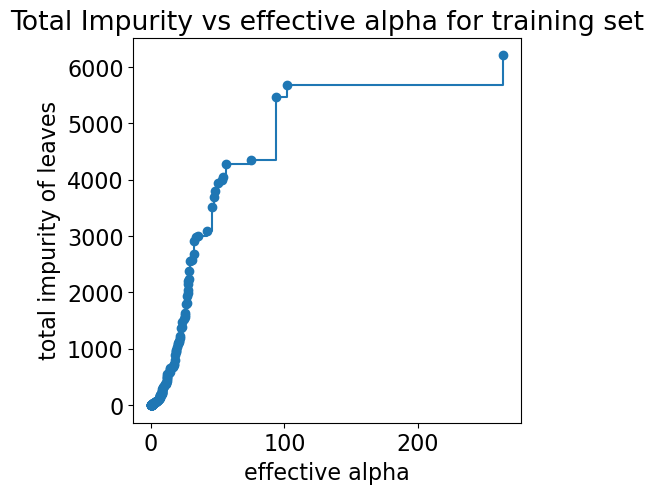

In [30]:
fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')

ax.set_xlabel('effective alpha')

ax.set_ylabel('total impurity of leaves')

ax.set_title('Total Impurity vs effective alpha for training set')

In [31]:
etrs = []

for ccp_alpha in ccp_alphas:
    
    etr = ExtraTreeRegressor(random_state = random_state, ccp_alpha = ccp_alpha)
    
    etr.fit(X_train, y_train)
    
    etrs.append(etr)

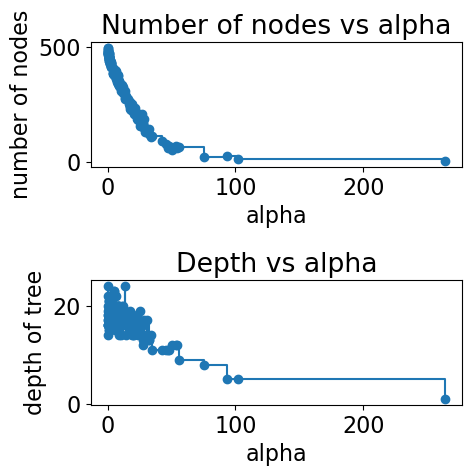

In [32]:
etrs = etrs[:-1]

ccp_alphas = ccp_alphas[:-1]

node_counts = [etr.tree_.node_count for etr in etrs]

depth = [etr.tree_.max_depth for etr in etrs]

fig, ax = plt.subplots(2, 1)

ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = 'steps-post')

ax[0].set_xlabel('alpha')

ax[0].set_ylabel('number of nodes')

ax[0].set_title('Number of nodes vs alpha')

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')

ax[1].set_xlabel('alpha')

ax[1].set_ylabel('depth of tree')

ax[1].set_title('Depth vs alpha')

fig.tight_layout()

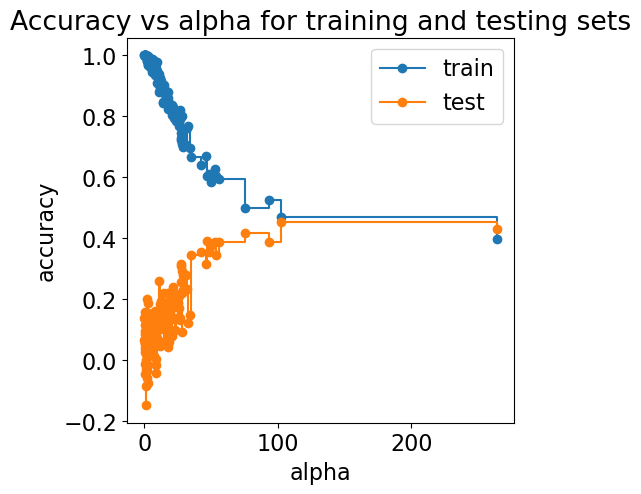

In [33]:
train_scores = [etr.score(X_train, y_train) for etr in etrs]

test_scores = [etr.score(X_test, y_test) for etr in etrs]

fig, ax = plt.subplots()

ax.set_xlabel('alpha')

ax.set_ylabel('accuracy')

ax.set_title('Accuracy vs alpha for training and testing sets')

ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')

ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')

ax.legend()

plt.show()

In [34]:
# extra tree with pruning

etr = ExtraTreeRegressor(random_state = random_state, ccp_alpha = 0.5)

# ExtraTreeRegressor(*, criterion='squared_error', splitter='random', 
#                    max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#                    min_weight_fraction_leaf=0.0, max_features=1.0, 
#                    random_state=None, min_impurity_decrease=0.0, 
#                    max_leaf_nodes=None, ccp_alpha=0.0)

etr.fit(X_train, y_train)

y_train_etr_pred = etr.predict(X_train)

y_test_etr_pred = etr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_dtr_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_dtr_pred))

print('--------')

print('Train Score:', etr.score(X_train, y_train))

print('Test Score:', etr.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_dtr_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_dtr_pred))

#print('--------')

#tree_data = tree.export_graphviz(etr, out_file = None) 

#graph = graphviz.Source(tree_data) 

#graph  

Train MSE: 21.783333333333335
Test MSE: 10262.995165432098
--------
Train Score: 0.9997387929668682
Test Score: 0.14587013425145381
--------
Train EVS: 0.9827886301673724
Test EVS: 0.16225731417737788


In [35]:
def et_reg(X_train, X_test, y_train, y_test, prune_list = np.zeros(shape(y_train)[1] - 1), prune = False):
    
    for m in range(shape(y_train)[1] - 1):
    
        y_train_trunc = np.ravel(np.array(list(y_train.iloc[:, m])))

        y_test_trunc = np.ravel(np.array(list(y_test.iloc[:, m])))
    
        etr = ExtraTreeRegressor(random_state = random_state, ccp_alpha = prune_list[m] * prune)
        
        etr.fit(X_train, y_train_trunc)

        y_pred_train = etr.predict(X_train)

        y_pred_train_rounded = [np.rint(y_pred_train[i]) for i in range(len(y_pred_train))]

        y_pred_test = etr.predict(X_test)

        y_pred_test_rounded = [np.rint(y_pred_test[i]) for i in range(len(y_pred_test))]
        
        if prune == False:
            
            path = etr.cost_complexity_pruning_path(X_train, y_train_trunc)
            
            ccp_alphas, impurities = path.ccp_alphas, path.impurities
        
            fig, ax = plt.subplots()

            ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')

            ax.set_xlabel('effective alpha')

            ax.set_ylabel('total impurity of leaves')

            ax.set_title('Total Impurity vs effective alpha for training set')
        
            etrs = []

            for ccp_alpha in ccp_alphas:
    
                etr = DecisionTreeRegressor(random_state = random_state, ccp_alpha = ccp_alpha)
    
                etr.fit(X_train, y_train_trunc)
    
                etrs.append(etr)
        
            etrs = etrs[:-1]

            ccp_alphas = ccp_alphas[:-1]

            node_counts = [etr.tree_.node_count for etr in etrs]

            depth = [etr.tree_.max_depth for etr in etrs]

            fig, ax = plt.subplots(2, 1)

            ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = 'steps-post')

            ax[0].set_xlabel('alpha')

            ax[0].set_ylabel('number of nodes')

            ax[0].set_title('Number of nodes vs alpha')

            ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = 'steps-post')

            ax[1].set_xlabel('alpha')

            ax[1].set_ylabel('depth of tree')

            ax[1].set_title('Depth vs alpha')

            fig.tight_layout()
        
            train_scores = [etr.score(X_train, y_train_trunc) for etr in etrs]

            test_scores = [etr.score(X_test, y_test_trunc) for etr in etrs]

            fig, ax = plt.subplots()

            ax.set_xlabel('alpha')

            ax.set_ylabel('accuracy')

            ax.set_title('Accuracy vs alpha for training and testing sets')

            ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')

            ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')

            ax.legend()

            plt.show()

        DF.append(['etr', 1 * prune, m + l,
                   round(etr.score(X_train, y_train_trunc), 5),
                   round(etr.score(X_test, y_test_trunc), 5),
                   round(explained_variance_score(y_train_trunc, y_pred_train), 5),
                   round(explained_variance_score(y_test_trunc, y_pred_test), 5)])
        
    return DF

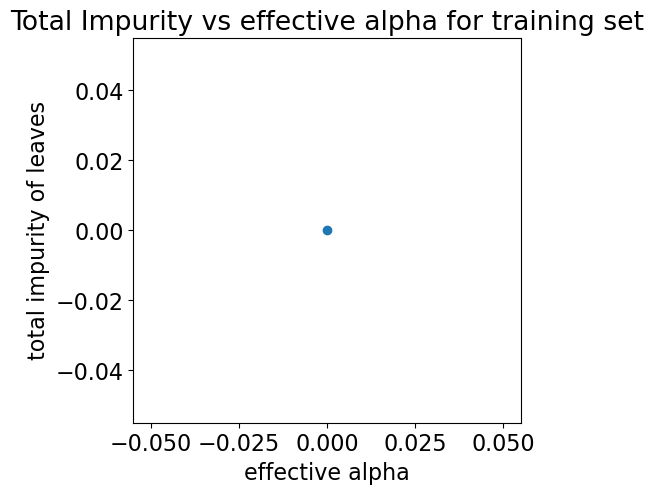

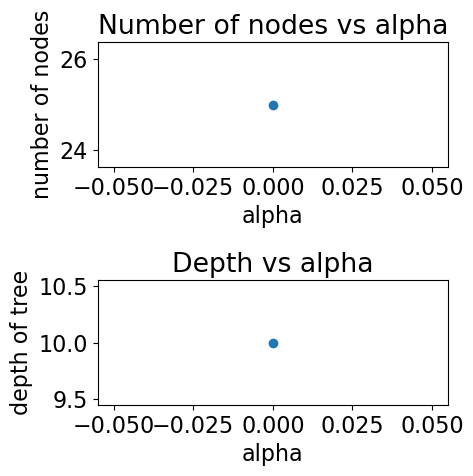

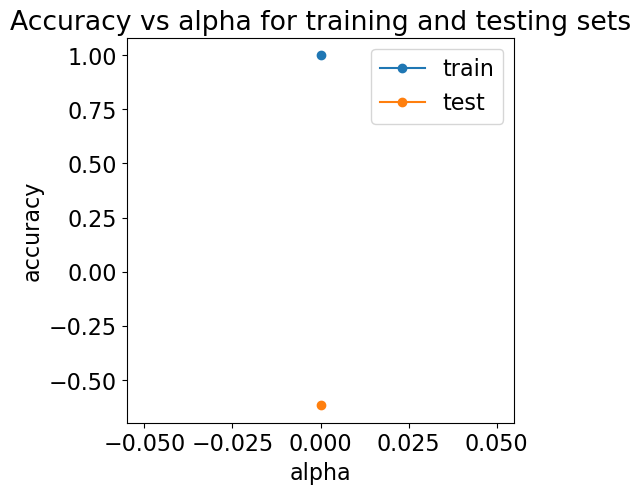

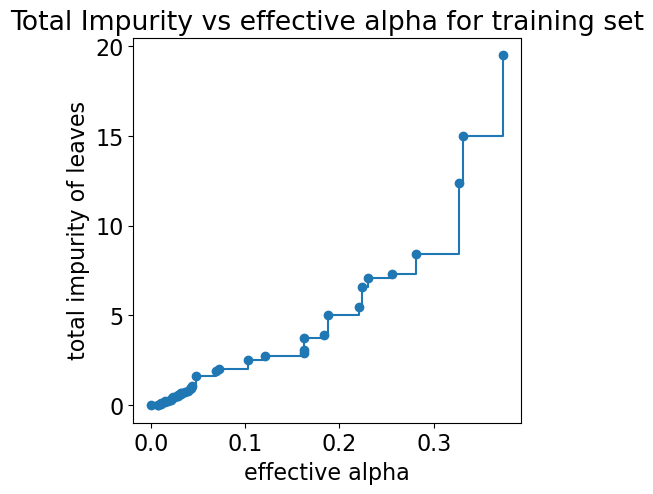

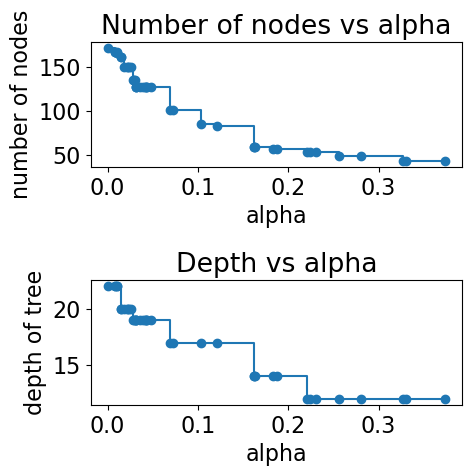

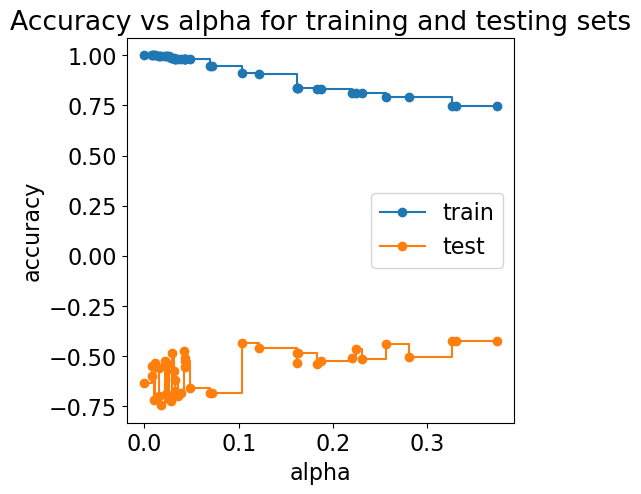

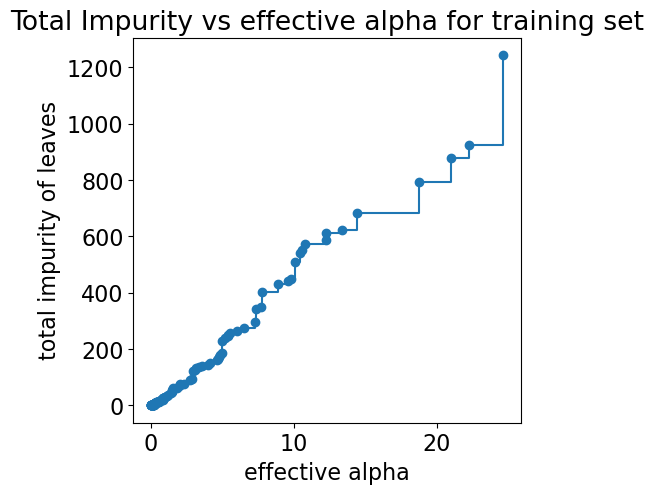

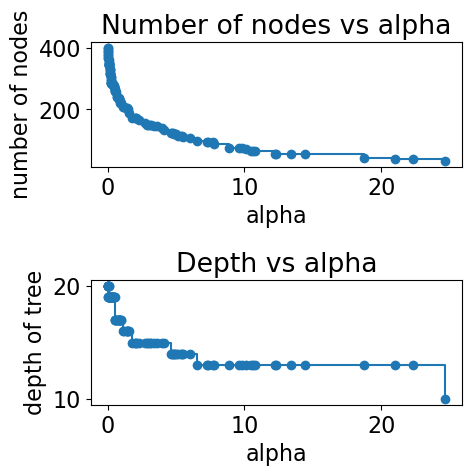

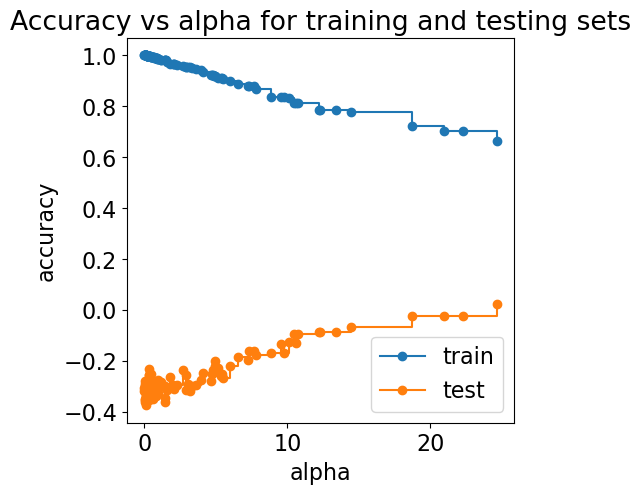

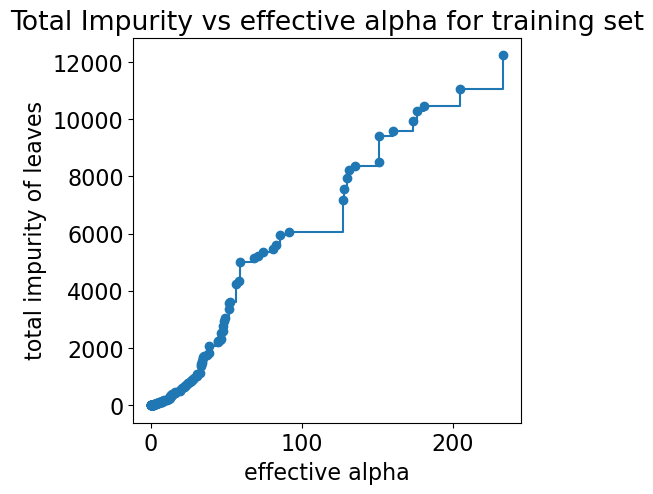

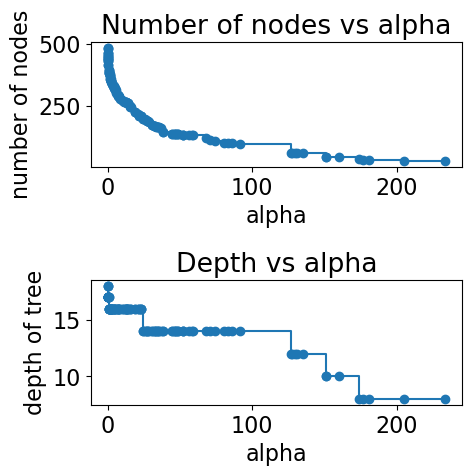

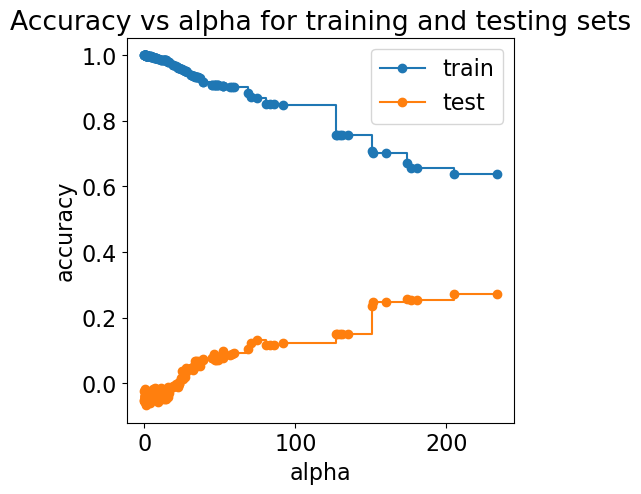

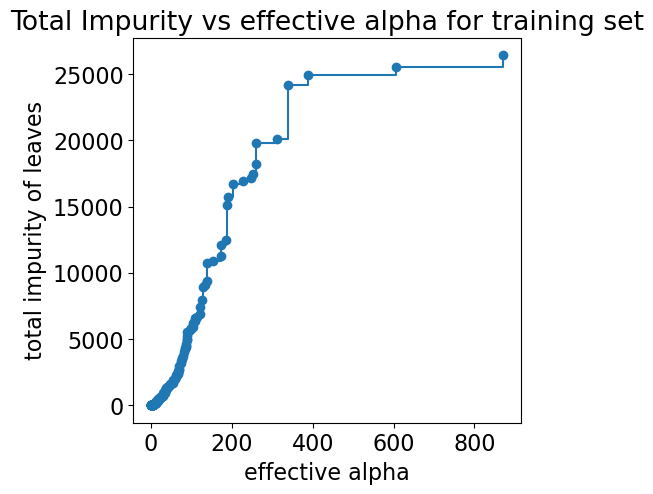

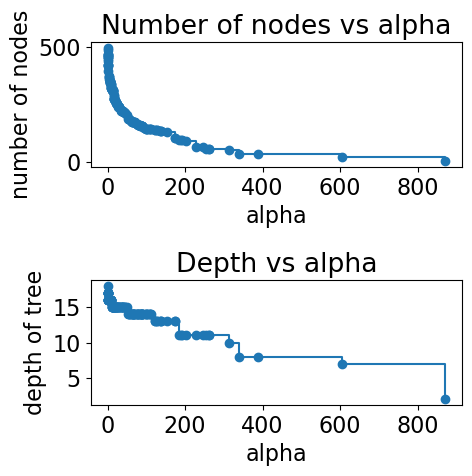

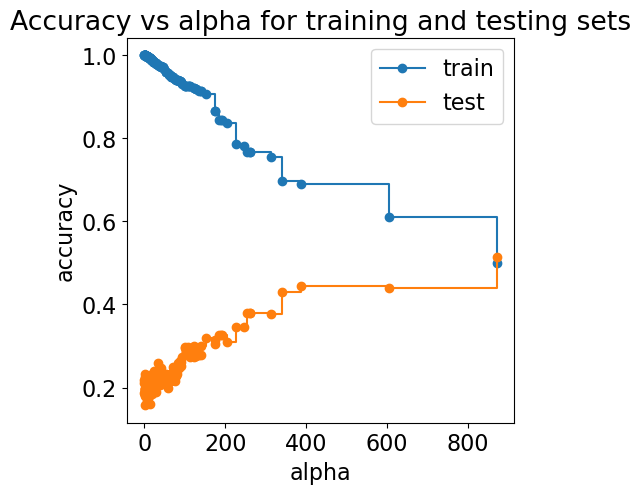

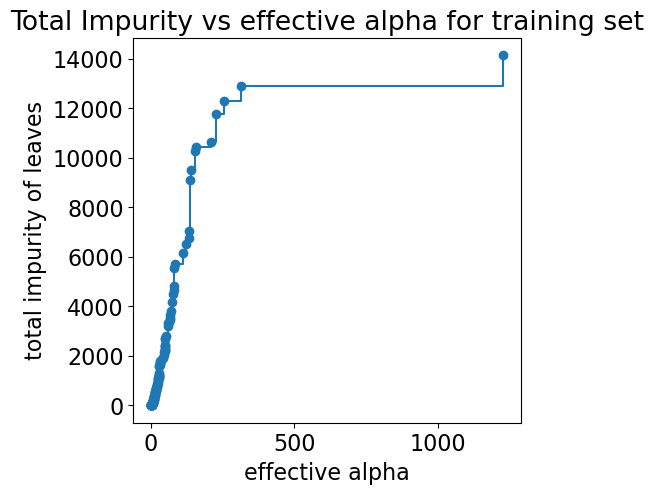

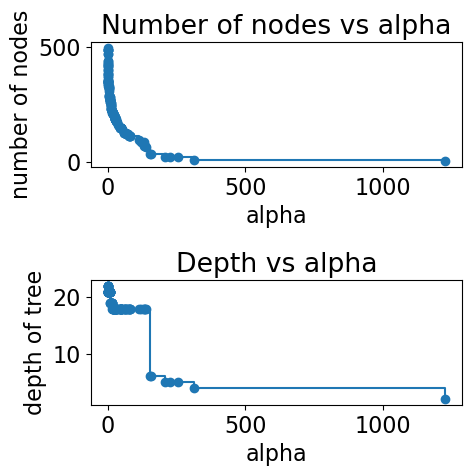

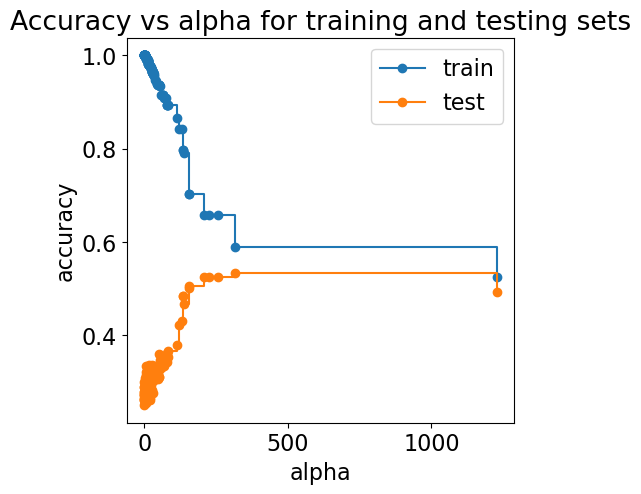

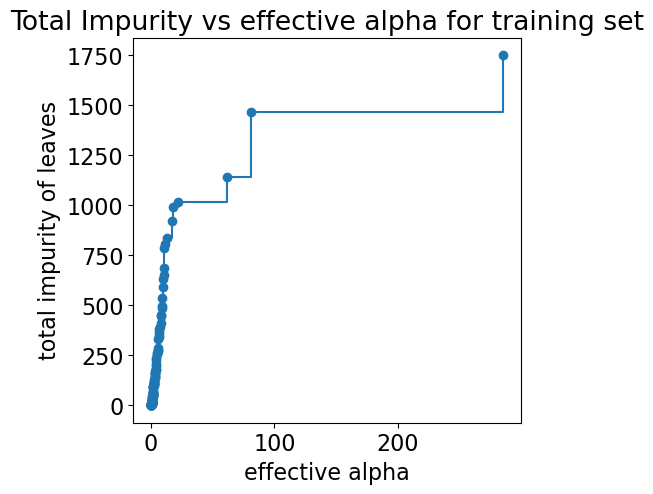

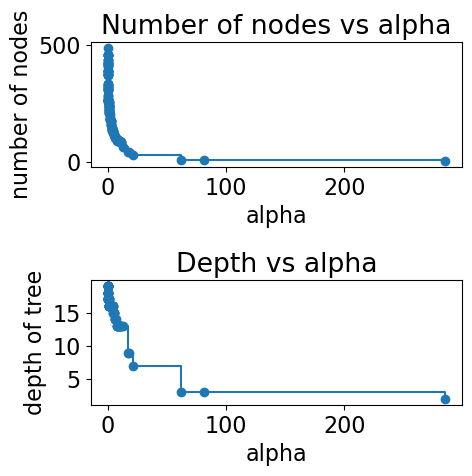

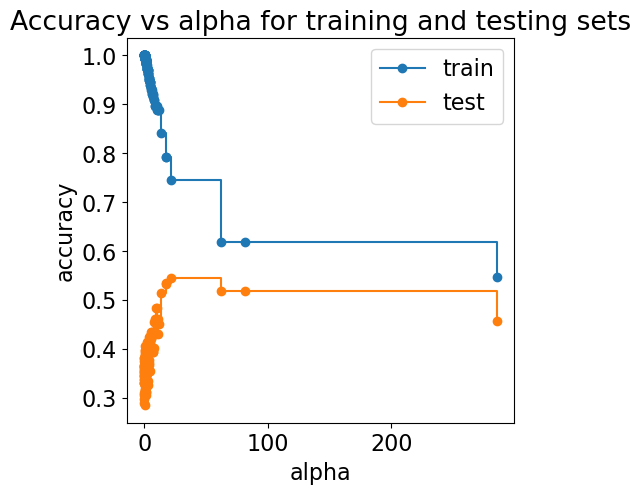

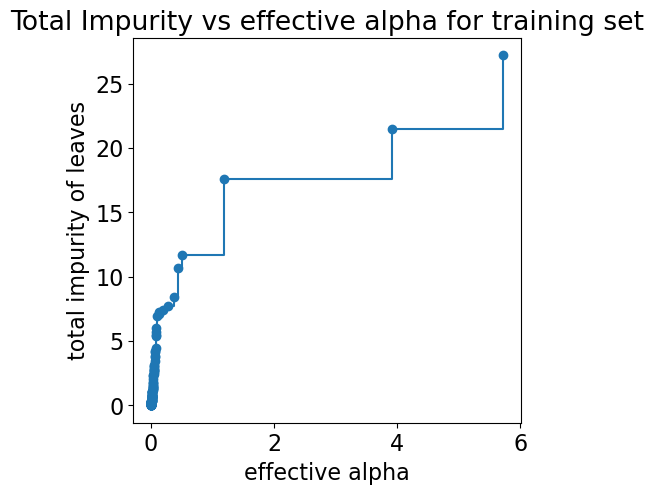

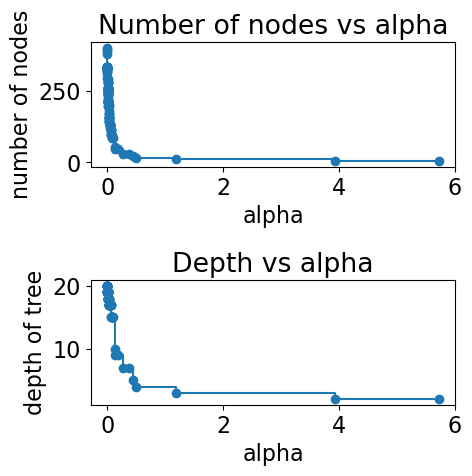

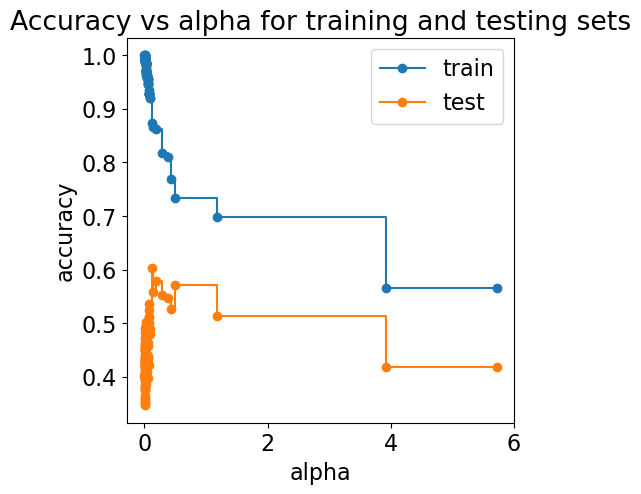

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726],
 ['dtr', 1, 9, 1.0, -1.05761, 1.0, -1.05761],
 ['dtr', 1, 10, 0.15764, 0.15901, 0.15764, 0.16791],
 ['dtr', 1, 11, 0.72275, -0.02509, 0.72275, -0.01583],
 ['dtr', 1, 12, 0.63831, 0.27245, 0.63831, 0.27291],
 ['dtr', 1, 13, 0.4992, 0.51344, 0.4992, 0.51401],
 ['dtr', 1, 14, 0.65884, 0.52571, 0.65884, 0.52635],
 ['dtr', 1, 15, 0.58876, 0.51255, 0.58876, 0.51303],
 ['dtr', 1, 16, 0.69773, 0.51399, 0.69773, 0.51407],
 ['etr', 0, 9, 1.0, -0.6167, 1.0, -0.76132],
 ['etr', 0, 10, 0.0, -0.01711, 1.0, -0.71091],
 ['etr', 0, 11, 0.0, -0.01939, 1.0, -0.23294],
 ['etr', 0, 12, 0.0, -0.01399, 1.0, 0.0108],
 ['etr', 0, 13, 

In [36]:
et_reg(X_train, X_test, y_train, y_test)

In [37]:
et_reg(X_train, X_test, y_train, y_test, 
       prune_list = [0, 1, 20, 250, 1000, 250, 100, 2], prune = True)

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726],
 ['dtr', 1, 9, 1.0, -1.05761, 1.0, -1.05761],
 ['dtr', 1, 10, 0.15764, 0.15901, 0.15764, 0.16791],
 ['dtr', 1, 11, 0.72275, -0.02509, 0.72275, -0.01583],
 ['dtr', 1, 12, 0.63831, 0.27245, 0.63831, 0.27291],
 ['dtr', 1, 13, 0.4992, 0.51344, 0.4992, 0.51401],
 ['dtr', 1, 14, 0.65884, 0.52571, 0.65884, 0.52635],
 ['dtr', 1, 15, 0.58876, 0.51255, 0.58876, 0.51303],
 ['dtr', 1, 16, 0.69773, 0.51399, 0.69773, 0.51407],
 ['etr', 0, 9, 1.0, -0.6167, 1.0, -0.76132],
 ['etr', 0, 10, 0.0, -0.01711, 1.0, -0.71091],
 ['etr', 0, 11, 0.0, -0.01939, 1.0, -0.23294],
 ['etr', 0, 12, 0.0, -0.01399, 1.0, 0.0108],
 ['etr', 0, 13, 

## Ensembles

### Bagging

In [38]:
# bagging

br = BaggingRegressor(random_state = random_state)

# BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, 
#                  bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, 
#                 n_jobs=None, random_state=None, verbose=0)

br.fit(X_train, y_train)

y_train_br_pred = br.predict(X_train)

y_test_br_pred = br.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_br_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_br_pred))

print('--------')

print('Train Score:', br.score(X_train, y_train))

print('Test Score:', br.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_br_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_br_pred))

Train MSE: 1226.463728888889
Test MSE: 8240.60984
--------
Train Score: 0.863581164438102
Test Score: 0.34535018878023327
--------
Train EVS: 0.863724072515524
Test EVS: 0.3496701474586499


In [39]:
def b_reg(X_train, X_test, y_train, y_test):
    
    for m in range(shape(y_train)[1] - 1):
    
        y_train_trunc = np.ravel(np.array(list(y_train.iloc[:, m])))

        y_test_trunc = np.ravel(np.array(list(y_test.iloc[:, m])))
    
        br = BaggingRegressor(random_state = random_state)
        
        br.fit(X_train, y_train_trunc)

        y_pred_train = br.predict(X_train)

        y_pred_train_rounded = [np.rint(y_pred_train[i]) for i in range(len(y_pred_train))]

        y_pred_test = br.predict(X_test)

        y_pred_test_rounded = [np.rint(y_pred_test[i]) for i in range(len(y_pred_test))]

        DF.append(['br', 'na', m + l,
                   round(br.score(X_train, y_train_trunc), 5),
                   round(br.score(X_test, y_test_trunc), 5),
                   round(explained_variance_score(y_train_trunc, y_pred_train), 5),
                   round(explained_variance_score(y_test_trunc, y_pred_test), 5)])
        
    return DF

In [40]:
b_reg(X_train, X_test, y_train, y_test)

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726],
 ['dtr', 1, 9, 1.0, -1.05761, 1.0, -1.05761],
 ['dtr', 1, 10, 0.15764, 0.15901, 0.15764, 0.16791],
 ['dtr', 1, 11, 0.72275, -0.02509, 0.72275, -0.01583],
 ['dtr', 1, 12, 0.63831, 0.27245, 0.63831, 0.27291],
 ['dtr', 1, 13, 0.4992, 0.51344, 0.4992, 0.51401],
 ['dtr', 1, 14, 0.65884, 0.52571, 0.65884, 0.52635],
 ['dtr', 1, 15, 0.58876, 0.51255, 0.58876, 0.51303],
 ['dtr', 1, 16, 0.69773, 0.51399, 0.69773, 0.51407],
 ['etr', 0, 9, 1.0, -0.6167, 1.0, -0.76132],
 ['etr', 0, 10, 0.0, -0.01711, 1.0, -0.71091],
 ['etr', 0, 11, 0.0, -0.01939, 1.0, -0.23294],
 ['etr', 0, 12, 0.0, -0.01399, 1.0, 0.0108],
 ['etr', 0, 13, 

### Random Forest

#### Random Forest

In [41]:
# random forest

rfr = RandomForestRegressor(n_estimators = 50, random_state = random_state)

# RandomForestRegressor(n_estimators=100, *, criterion=max_depth=None, 
#                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                       max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                       bootstrap=True, oob_score=False, n_jobs=None, 
#                       random_state=None, verbose=0, warm_start=False, 
#                       class_weight=None, ccp_alpha=0.0, max_samples=None)

rfr.fit(X_train, y_train)

y_train_rfr_pred = rfr.predict(X_train)

y_test_rfr_pred = rfr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_dtr_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_dtr_pred))

print('--------')

print('Train Score:', rfr.score(X_train, y_train))

print('Test Score:', rfr.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_dtr_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_dtr_pred))

Train MSE: 21.783333333333335
Test MSE: 10262.995165432098
--------
Train Score: 0.9038904696265647
Test Score: 0.39412201110076533
--------
Train EVS: 0.9827886301673724
Test EVS: 0.16225731417737788


In [42]:
# random forest with pruning

rfr = RandomForestRegressor(n_estimators = 50, random_state = random_state, ccp_alpha = 0.5)

# RandomForestRegressor(n_estimators=100, *, criterion=max_depth=None, 
#                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                       max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                       bootstrap=True, oob_score=False, n_jobs=None, 
#                       random_state=None, verbose=0, warm_start=False, 
#                       class_weight=None, ccp_alpha=0.0, max_samples=None)

rfr.fit(X_train, y_train)

y_train_rfr_pred = rfr.predict(X_train)

y_test_rfr_pred = rfr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_dtr_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_dtr_pred))

print('--------')

print('Train Score:', rfr.score(X_train, y_train))

print('Test Score:', rfr.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_dtr_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_dtr_pred))

Train MSE: 21.783333333333335
Test MSE: 10262.995165432098
--------
Train Score: 0.902668989265694
Test Score: 0.3872543905900104
--------
Train EVS: 0.9827886301673724
Test EVS: 0.16225731417737788


In [43]:
def rf_reg(X_train, X_test, y_train, y_test, prune_list = np.zeros(shape(y_train)[1] - 1), prune = False):
    
    for m in range(shape(y_train)[1] - 1):
    
        y_train_trunc = np.ravel(np.array(list(y_train.iloc[:, m])))

        y_test_trunc = np.ravel(np.array(list(y_test.iloc[:, m])))
    
        rfr = RandomForestRegressor(n_estimators = 50, random_state = random_state, 
                                    ccp_alpha = prune_list[m] * prune)
        
        rfr.fit(X_train, y_train_trunc)

        y_pred_train = rfr.predict(X_train)

        y_pred_train_rounded = [np.rint(y_pred_train[i]) for i in range(len(y_pred_train))]

        y_pred_test = rfr.predict(X_test)

        y_pred_test_rounded = [np.rint(y_pred_test[i]) for i in range(len(y_pred_test))]

        DF.append(['rfr', 1 * prune, m + l,
                   round(rfr.score(X_train, y_train_trunc), 5),
                   round(rfr.score(X_test, y_test_trunc), 5),
                   round(explained_variance_score(y_train_trunc, y_pred_train), 5),
                   round(explained_variance_score(y_test_trunc, y_pred_test), 5)])
        
    return DF

In [44]:
rf_reg(X_train, X_test, y_train, y_test)

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726],
 ['dtr', 1, 9, 1.0, -1.05761, 1.0, -1.05761],
 ['dtr', 1, 10, 0.15764, 0.15901, 0.15764, 0.16791],
 ['dtr', 1, 11, 0.72275, -0.02509, 0.72275, -0.01583],
 ['dtr', 1, 12, 0.63831, 0.27245, 0.63831, 0.27291],
 ['dtr', 1, 13, 0.4992, 0.51344, 0.4992, 0.51401],
 ['dtr', 1, 14, 0.65884, 0.52571, 0.65884, 0.52635],
 ['dtr', 1, 15, 0.58876, 0.51255, 0.58876, 0.51303],
 ['dtr', 1, 16, 0.69773, 0.51399, 0.69773, 0.51407],
 ['etr', 0, 9, 1.0, -0.6167, 1.0, -0.76132],
 ['etr', 0, 10, 0.0, -0.01711, 1.0, -0.71091],
 ['etr', 0, 11, 0.0, -0.01939, 1.0, -0.23294],
 ['etr', 0, 12, 0.0, -0.01399, 1.0, 0.0108],
 ['etr', 0, 13, 

In [45]:
rf_reg(X_train, X_test, y_train, y_test, 
       prune_list = [0, 1, 20, 300, 1000, 400, 40, 2], prune = True)

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726],
 ['dtr', 1, 9, 1.0, -1.05761, 1.0, -1.05761],
 ['dtr', 1, 10, 0.15764, 0.15901, 0.15764, 0.16791],
 ['dtr', 1, 11, 0.72275, -0.02509, 0.72275, -0.01583],
 ['dtr', 1, 12, 0.63831, 0.27245, 0.63831, 0.27291],
 ['dtr', 1, 13, 0.4992, 0.51344, 0.4992, 0.51401],
 ['dtr', 1, 14, 0.65884, 0.52571, 0.65884, 0.52635],
 ['dtr', 1, 15, 0.58876, 0.51255, 0.58876, 0.51303],
 ['dtr', 1, 16, 0.69773, 0.51399, 0.69773, 0.51407],
 ['etr', 0, 9, 1.0, -0.6167, 1.0, -0.76132],
 ['etr', 0, 10, 0.0, -0.01711, 1.0, -0.71091],
 ['etr', 0, 11, 0.0, -0.01939, 1.0, -0.23294],
 ['etr', 0, 12, 0.0, -0.01399, 1.0, 0.0108],
 ['etr', 0, 13, 

### Extra Trees 

#### Extra Trees  with Gini Criterion

In [46]:
# extra trees with gini

etsr = ExtraTreesRegressor(n_estimators = 50, random_state = random_state)

# ExtraTreesRegressor(n_estimators=100, *, criterion=max_depth=None, 
#                     min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                     max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                     bootstrap=False, oob_score=False, n_jobs=None, 
#                     random_state=None, verbose=0, warm_start=False, class_weight=None, 
#                     ccp_alpha=0.0, max_samples=None)

etsr.fit(X_train, y_train)

y_train_etsr_pred = etsr.predict(X_train)

y_test_etsr_pred = etsr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_dtr_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_dtr_pred))

print('--------')

print('Train Score:', etsr.score(X_train, y_train))

print('Test Score:', etsr.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_dtr_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_dtr_pred))

Train MSE: 21.783333333333335
Test MSE: 10262.995165432098
--------
Train Score: 0.9999953264427079
Test Score: 0.33291238086058306
--------
Train EVS: 0.9827886301673724
Test EVS: 0.16225731417737788


In [47]:
# extra trees with pruning

etsr = ExtraTreesRegressor(n_estimators = 50, random_state = random_state, ccp_alpha = 0.5)

# ExtraTreesRegressor(n_estimators=100, *, criterion=max_depth=None, 
#                     min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                     max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                     bootstrap=False, oob_score=False, n_jobs=None, 
#                     random_state=None, verbose=0, warm_start=False, class_weight=None, 
#                     ccp_alpha=0.0, max_samples=None)

etsr.fit(X_train, y_train)

y_train_etsr_pred = etsr.predict(X_train)

y_test_etsr_pred = etsr.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_dtr_pred))

print('Test MSE:', mean_squared_error(y_test, y_test_dtr_pred))

print('--------')

print('Train Score:', etsr.score(X_train, y_train))

print('Test Score:', etsr.score(X_test, y_test))

print('--------')

print('Train EVS:', explained_variance_score(y_train, y_train_dtr_pred))

print('Test EVS:', explained_variance_score(y_test, y_test_dtr_pred))

Train MSE: 21.783333333333335
Test MSE: 10262.995165432098
--------
Train Score: 0.9996832493420489
Test Score: 0.3523545336958221
--------
Train EVS: 0.9827886301673724
Test EVS: 0.16225731417737788


In [48]:
def ets_reg(X_train, X_test, y_train, y_test, prune_list = np.zeros(shape(y_train)[1] - 1), prune = False):
    
    for m in range(shape(y_train)[1] - 1):
    
        y_train_trunc = np.ravel(np.array(list(y_train.iloc[:, m])))

        y_test_trunc = np.ravel(np.array(list(y_test.iloc[:, m])))
    
        etsr = ExtraTreesRegressor(n_estimators = 50, random_state = random_state,
                                   ccp_alpha = prune_list[m] * prune)
        
        etsr.fit(X_train, y_train_trunc)

        y_pred_train = etsr.predict(X_train)

        y_pred_train_rounded = [np.rint(y_pred_train[i]) for i in range(len(y_pred_train))]

        y_pred_test = etsr.predict(X_test)

        y_pred_test_rounded = [np.rint(y_pred_test[i]) for i in range(len(y_pred_test))]

        DF.append(['etsr', 1 * prune, m + l,
                   round(etsr.score(X_train, y_train_trunc), 5),
                   round(etsr.score(X_test, y_test_trunc), 5),
                   round(explained_variance_score(y_train_trunc, y_pred_train), 5),
                   round(explained_variance_score(y_test_trunc, y_pred_test), 5)])
        
    return DF

In [49]:
ets_reg(X_train, X_test, y_train, y_test)

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726],
 ['dtr', 1, 9, 1.0, -1.05761, 1.0, -1.05761],
 ['dtr', 1, 10, 0.15764, 0.15901, 0.15764, 0.16791],
 ['dtr', 1, 11, 0.72275, -0.02509, 0.72275, -0.01583],
 ['dtr', 1, 12, 0.63831, 0.27245, 0.63831, 0.27291],
 ['dtr', 1, 13, 0.4992, 0.51344, 0.4992, 0.51401],
 ['dtr', 1, 14, 0.65884, 0.52571, 0.65884, 0.52635],
 ['dtr', 1, 15, 0.58876, 0.51255, 0.58876, 0.51303],
 ['dtr', 1, 16, 0.69773, 0.51399, 0.69773, 0.51407],
 ['etr', 0, 9, 1.0, -0.6167, 1.0, -0.76132],
 ['etr', 0, 10, 0.0, -0.01711, 1.0, -0.71091],
 ['etr', 0, 11, 0.0, -0.01939, 1.0, -0.23294],
 ['etr', 0, 12, 0.0, -0.01399, 1.0, 0.0108],
 ['etr', 0, 13, 

In [50]:
ets_reg(X_train, X_test, y_train, y_test, 
        prune_list = [0, 0.5, 50, 500, 1000, 1000, 100, 2], prune = True)

[['dtr', 0, 9, 0.0, -0.00235, 1.0, -0.61141],
 ['dtr', 0, 10, 0.0, -0.01711, 1.0, -0.55903],
 ['dtr', 0, 11, 0.0, -0.01939, 1.0, -0.32085],
 ['dtr', 0, 12, 0.0, -0.01399, 1.0, -0.04439],
 ['dtr', 0, 13, 0.0, -0.00894, 0.99998, 0.24178],
 ['dtr', 0, 14, 0.0, -0.00813, 0.99998, 0.27832],
 ['dtr', 0, 15, 0.0, -0.01053, 0.99999, 0.34451],
 ['dtr', 0, 16, 0.0, -0.01416, 1.0, 0.35726],
 ['dtr', 1, 9, 1.0, -1.05761, 1.0, -1.05761],
 ['dtr', 1, 10, 0.15764, 0.15901, 0.15764, 0.16791],
 ['dtr', 1, 11, 0.72275, -0.02509, 0.72275, -0.01583],
 ['dtr', 1, 12, 0.63831, 0.27245, 0.63831, 0.27291],
 ['dtr', 1, 13, 0.4992, 0.51344, 0.4992, 0.51401],
 ['dtr', 1, 14, 0.65884, 0.52571, 0.65884, 0.52635],
 ['dtr', 1, 15, 0.58876, 0.51255, 0.58876, 0.51303],
 ['dtr', 1, 16, 0.69773, 0.51399, 0.69773, 0.51407],
 ['etr', 0, 9, 1.0, -0.6167, 1.0, -0.76132],
 ['etr', 0, 10, 0.0, -0.01711, 1.0, -0.71091],
 ['etr', 0, 11, 0.0, -0.01939, 1.0, -0.23294],
 ['etr', 0, 12, 0.0, -0.01399, 1.0, 0.0108],
 ['etr', 0, 13, 

## Table

In [54]:
DF2 = pd.DataFrame(np.array(DF), columns = ['Method', 'Pruning', 'k', 'Train_Score',
                                            'Test_Score', 'Train_EVS', 'Test_EVS'])

In [55]:
DF2

,Method,Pruning,k,Train_Score,Test_Score,Train_EVS,Test_EVS
0,dtr,0,9,0.0,-0.00235,1.0,-0.61141
1,dtr,0,10,0.0,-0.01711,1.0,-0.55903
2,dtr,0,11,0.0,-0.01939,1.0,-0.32085
3,dtr,0,12,0.0,-0.01399,1.0,-0.04439
4,dtr,0,13,0.0,-0.00894,0.99998,0.24178
...,...,...,...,...,...,...,...
67,etsr,1,12,0.43728,0.46255,0.43728,0.46539
68,etsr,1,13,0.47919,0.50862,0.47919,0.50921
69,etsr,1,14,0.4978,0.52968,0.4978,0.52993
70,etsr,1,15,0.56555,0.5629,0.56555,0.563


In [56]:
DF2.to_csv('Regression--Tree--Subset--Sampling.csv')